## Importing all libaries

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
import re
%matplotlib inline
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE


## Reading the data (adjoining them together / getting all NA values)

In [56]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
frames = [train_data, test_data]
all_data = pd.concat(frames, sort = False)

all_data_na = all_data.isna().sum()
train_na = train_data.isna().sum()
test_na = test_data.isna().sum()

pd.concat([train_na, test_na, all_data_na], axis=1, keys = ['Train NA', 'Test NA', 'All NA'])

,Train NA,Test NA,All NA
PassengerId,0,0.0,0
Survived,0,NaN,418
Pclass,0,0.0,0
Name,0,0.0,0
Sex,0,0.0,0
Age,177,86.0,263
SibSp,0,0.0,0
Parch,0,0.0,0
Ticket,0,0.0,0
Fare,0,1.0,1


## 1- Calcultating survivals

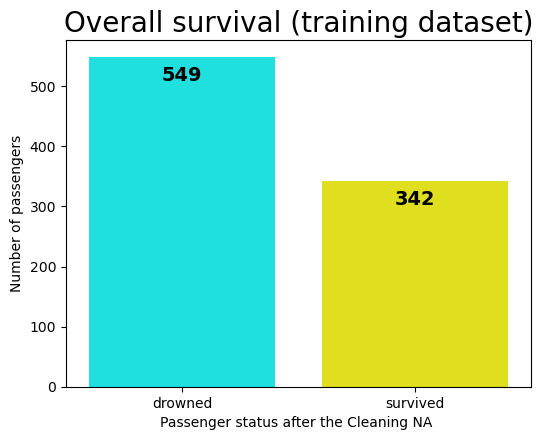

0.0    0.616162
1.0    0.383838
Name: Survived, dtype: float64

In [57]:
plt.figure(figsize=(6, 4.5)) 

ax = sns.countplot(x = 'Survived', data = all_data, palette=["#00FFFF", "#FFFF00"])
plt.xticks( np.arange(2), ['drowned', 'survived'] )
plt.title('Overall survival (training dataset)',fontsize= 20)

plt.xlabel('Passenger status after the Cleaning NA ')
plt.ylabel('Number of passengers')

labels = (all_data['Survived'].value_counts())

for i, v in enumerate(labels):
    ax.text(i, v-40, str(v), horizontalalignment = 'center', size = 14, color = 'black', fontweight = 'bold')

plt.show()
#precentages of survival and drowning of the passengers
all_data['Survived'].value_counts(normalize = True)


There are 891 passengers in the train dataset, 549 (61,6%) of them drowned and only 342 (38,4%) survived. But we know, that lifeboats (16 wooden lifeboats and four collapsible) could carry 53% of total passengers.

## 2 -Age Distribution
#### (263 missing values)

C:\Users\Saif\AppData\Local\Temp\ipykernel_15420\2758870595.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[(all_data["Age"] > 0)].Age, kde_kws={"lw": 3}, bins = 50)


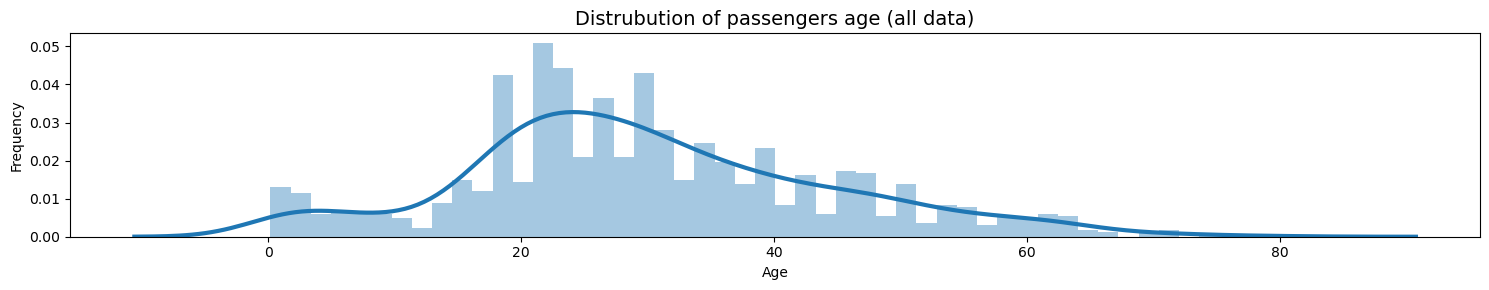

In [58]:
plt.figure(figsize=(15, 3))

# ploting a one dimensional distribution of Age
sns.distplot(all_data[(all_data["Age"] > 0)].Age, kde_kws={"lw": 3}, bins = 50)

plt.title('Distrubution of passengers age (all data)',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()

#### Descriprive statistics excluding NA values

In [59]:
age_distr = pd.DataFrame(all_data['Age'].describe())
age_distr.transpose()
# Mean age is 29.9
# Min age is 0.17
# Max age is 80

,count,mean,std,min,25%,50%,75%,max
Age,1046.0,29.881138,14.413493,0.17,21.0,28.0,39.0,80.0


## Relation between age and survival

C:\Users\Saif\AppData\Local\Temp\ipykernel_15420\1394886684.py:7: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(y='Survived', x='Age', data=train_data,


          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0


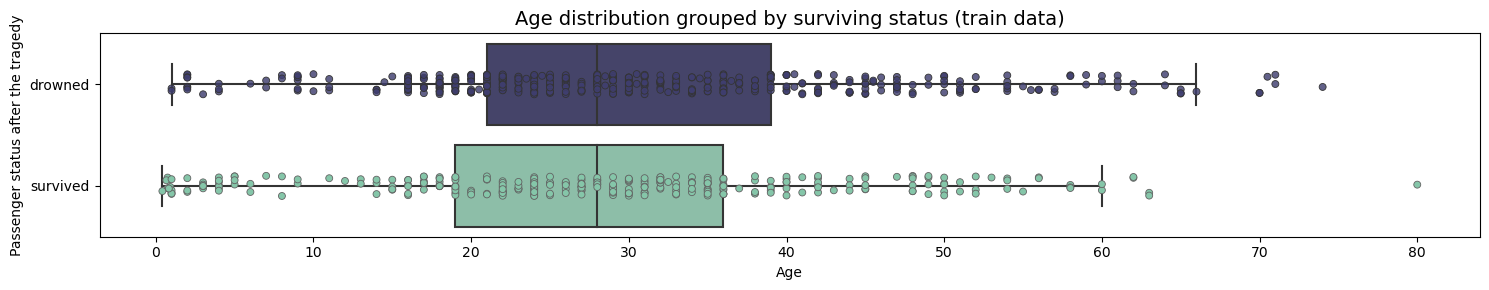

In [60]:
plt.figure(figsize=(15, 3))

# Box plot to show Age distributions with respect to survival status.
sns.boxplot(y='Survived', x='Age', data=train_data, palette=["#3f3e6fd1", "#85c6a9"], fliersize=0, orient='h')

# Scatterplot for each category.
sns.stripplot(y='Survived', x='Age', data=train_data,
              linewidth=0.6, palette=["#3f3e6fd1", "#85c6a9"], orient='h')

plt.yticks(np.arange(2), ['drowned', 'survived'])
plt.title('Age distribution grouped by surviving status (train data)', fontsize=14)
plt.ylabel('Passenger status after the tragedy')
plt.tight_layout()

# Use describe() to get statistical information about each group
print(pd.DataFrame(train_data.groupby('Survived')['Age'].describe()))


The Age of all passengers vary from about 0.17 year to 80 years with average 29.88. The mean age of survived passenger is 28.23 which on 2.39 smaller than the mean age of drowned passengers (only passengers we know survived status for). It looks like there is a slightly bigger chance to survive for younger people.

In [61]:
#Making sure that 80 is the highest age
max_age = all_data["Age"].max()
print (max_age)
#Mistake in data (Real age of passenger 631 was 48)
train_data.loc[train_data['PassengerId'] == 631, 'Age'] = 48
all_data.loc[all_data['PassengerId'] == 631, 'Age'] = 48

pd.DataFrame(all_data.groupby('Survived')['Age'].describe())
#now the data makes more sense
all_data[all_data['Age'] == max(all_data['Age'] )]

80.0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,988,NaN,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.85,C46,S


C:\Users\Saif\AppData\Local\Temp\ipykernel_15420\3096787960.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(age_1_class["Age"], shade=True, color='#eed4d0', label = '1st class')
C:\Users\Saif\AppData\Local\Temp\ipykernel_15420\3096787960.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(age_2_class["Age"], shade=True,  color='#cda0aa', label = '2nd class')
C:\Users\Saif\AppData\Local\Temp\ipykernel_15420\3096787960.py:23: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(age_3_class["Age"], shade=True,color='#a2708e', label = '3rd class')


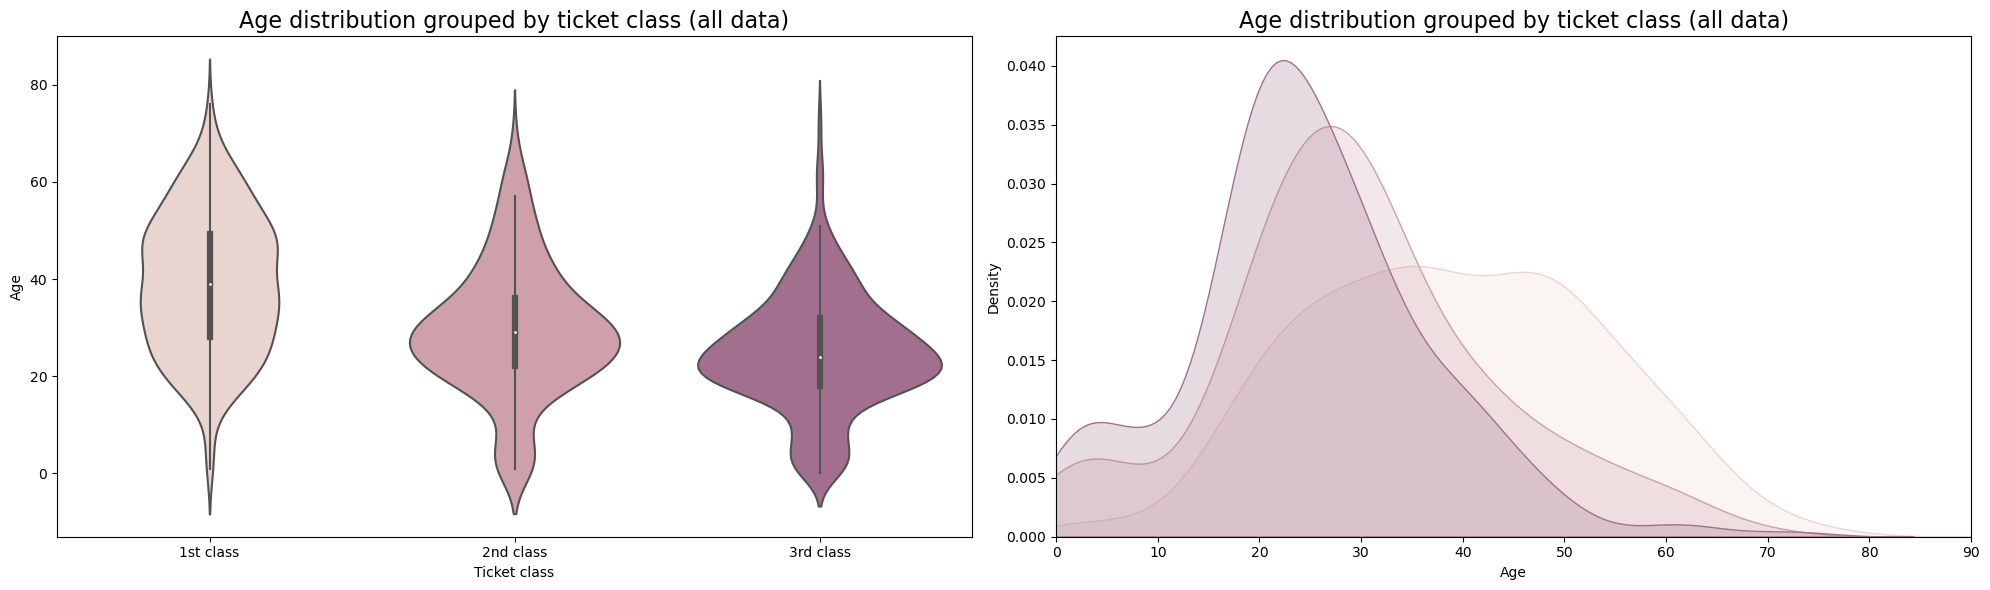

In [62]:
# set size
plt.figure(figsize=(20, 6))

# set palette
palette = sns.cubehelix_palette(5, start = 3)
# box plot ans striplot wasnt working because of the duplicates so the team suggested violinplot
plt.subplot(1, 2, 1)

sns.violinplot(x = 'Pclass', y = 'Age', data = all_data,  palette = palette)
plt.xticks( np.arange(3), ['1st class', '2nd class', '3rd class'])
plt.title('Age distribution grouped by ticket class (all data)',fontsize= 16)
plt.xlabel('Ticket class')
plt.subplot(1, 2, 2)

# To use kdeplot I need to create variables with filtered data for each category
age_1_class = all_data[(all_data["Age"] > 0) & (all_data["Pclass"] == 1)]
age_2_class = all_data[(all_data["Age"] > 0) & (all_data["Pclass"] == 2)]
age_3_class = all_data[(all_data["Age"] > 0) & (all_data["Pclass"] == 3)]

# Ploting the 3 variables that we create
sns.kdeplot(age_1_class["Age"], shade=True, color='#eed4d0', label = '1st class')
sns.kdeplot(age_2_class["Age"], shade=True,  color='#cda0aa', label = '2nd class')
sns.kdeplot(age_3_class["Age"], shade=True,color='#a2708e', label = '3rd class')
plt.title('Age distribution grouped by ticket class (all data)',fontsize= 16)
plt.xlabel('Age')
plt.xlim(0, 90)
plt.tight_layout()
plt.show()

In [63]:
pd.DataFrame(all_data.groupby('Pclass')['Age'].describe())
#There is a higher chance of the passenger being older if he is in a higher class

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,284.0,39.047254,14.353217,0.92,28.0,39.0,49.25,76.0
2,261.0,29.506705,13.638627,0.67,22.0,29.0,36.00,70.0
3,501.0,24.816367,11.958202,0.17,18.0,24.0,32.00,74.0


## Age in comparision with different classes and the gender

C:\Users\Saif\AppData\Local\Temp\ipykernel_15420\732418257.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = 'Sex', y = 'Age', data = age_1_class,
C:\Users\Saif\AppData\Local\Temp\ipykernel_15420\732418257.py:14: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = 'Sex', y = 'Age', data = age_2_class,
C:\Users\Saif\AppData\Local\Temp\ipykernel_15420\732418257.py:22: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(x = 'Sex', y = 'Age', data = age_3_class,


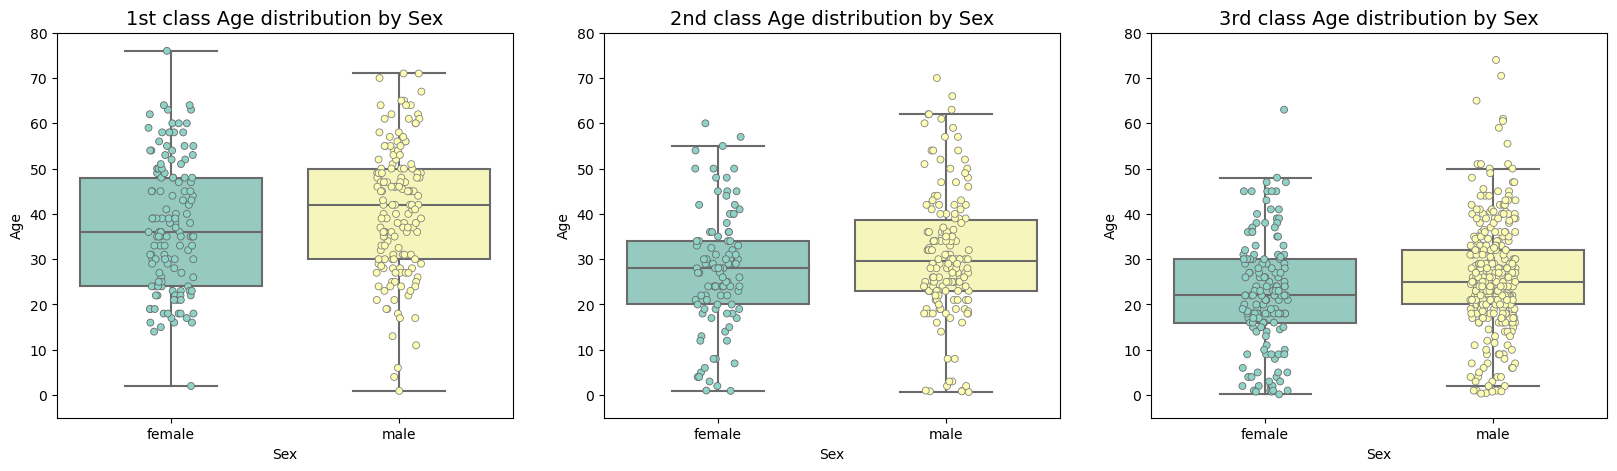

In [64]:
plt.figure(figsize=(20, 5))
palette = "Set3"
plt.subplot(1, 3, 1)
sns.boxplot(x = 'Sex', y = 'Age', data = age_1_class,
     palette = palette, fliersize = 0)
sns.stripplot(x = 'Sex', y = 'Age', data = age_1_class,
     linewidth = 0.6, palette = palette)
plt.title('1st class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)

plt.subplot(1, 3, 2)
sns.boxplot(x = 'Sex', y = 'Age', data = age_2_class,
     palette = palette, fliersize = 0)
sns.stripplot(x = 'Sex', y = 'Age', data = age_2_class,
     linewidth = 0.6, palette = palette)
plt.title('2nd class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)

plt.subplot(1, 3, 3)
sns.boxplot(x = 'Sex', y = 'Age',  data = age_3_class,
     order = ['female', 'male'], palette = palette, fliersize = 0)
sns.stripplot(x = 'Sex', y = 'Age', data = age_3_class,
     order = ['female', 'male'], linewidth = 0.6, palette = palette)
plt.title('3rd class Age distribution by Sex',fontsize= 14)
plt.ylim(-5, 80)

plt.show()


### discriptive statistics on age and gener in each class

In [65]:
#getting general statistics for each class

age_1_class_stat = pd.DataFrame(age_1_class.groupby('Sex')['Age'].describe())
age_2_class_stat = pd.DataFrame(age_2_class.groupby('Sex')['Age'].describe())
age_3_class_stat = pd.DataFrame(age_3_class.groupby('Sex')['Age'].describe())

#concatenating all stats together
pd.concat([age_1_class_stat, age_2_class_stat, age_3_class_stat], axis=0, sort = False, keys = ['1st', '2nd', '3rd'])

count       mean        std   min   25%   50%    75%   max
    Sex                                                               
1st female  133.0  37.037594  14.272460  2.00  24.0  36.0  48.00  76.0
    male    151.0  40.817351  14.236835  0.92  30.0  42.0  50.00  71.0
2nd female  103.0  27.499223  12.911747  0.92  20.0  28.0  34.00  60.0
    male    158.0  30.815380  13.977400  0.67  23.0  29.5  38.75  70.0
3rd female  152.0  22.185329  12.205254  0.17  16.0  22.0  30.00  63.0
    male    349.0  25.962264  11.682415  0.33  20.0  25.0  32.00  74.0

## Name Titles

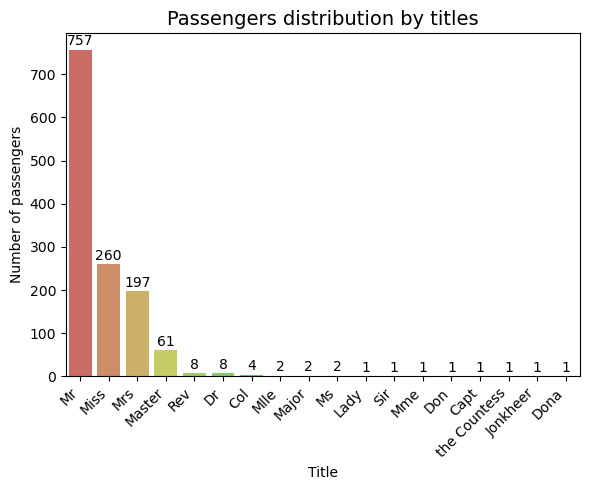

In [66]:
# using split method by comma to divide Name in two parts and save the second part

all_data['Title'] = all_data['Name'].str.split(',', expand = True)[1].str.split('.', expand = True)[0].str.strip(' ')
plt.figure(figsize=(6, 5))
ax = sns.countplot( x = 'Title', data = all_data, palette = "hls", order = all_data['Title'].value_counts().index)
_ = plt.xticks(rotation=45, horizontalalignment='right',fontweight='light'  )

plt.title('Passengers distribution by titles',fontsize= 14)
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (all_data['Title'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.tight_layout()
plt.show()

# Mr was the most common title on board

In [67]:
all_data[all_data['Title']=='Ms']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
443,444,1.0,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.00,NaN,S,Ms
88,980,NaN,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,Ms


In [68]:
# similar titles were converted by using a title the dictionary for example Ms to Miss
title_dict = {  'Mr':     'Mr',
                'Mrs':    'Mrs',
                'Miss':   'Miss',
                'Master': 'Master',
              
                'Ms':     'Miss',
                'Mme':    'Mrs',
                'Mlle':   'Miss',

                'Capt':   'military',
                'Col':    'military',
                'Major':  'military',

                'Dr':     'Dr',
                'Rev':    'Rev',
                  
                'Sir':    'honor',
                'the Countess': 'honor',
                'Lady':   'honor',
                'Jonkheer': 'honor',
                'Don':    'honor',
                'Dona':   'honor' }

# map titles to category
all_data['Title_category'] = all_data['Title'].map(title_dict)

### Comparing Titles with survival and drowning stats

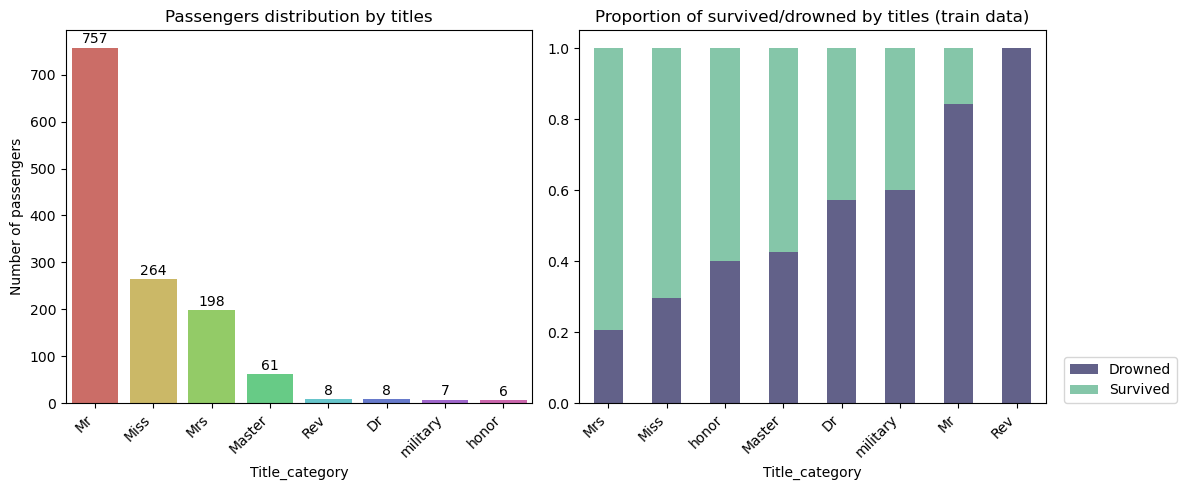

In [69]:
# redoing the figure plot after converting some of the titles
fig = plt.figure(figsize=(12, 5))


ax1 = fig.add_subplot(121)
ax = sns.countplot(x = 'Title_category', data = all_data, palette = "hls", order = all_data['Title_category'].value_counts().index)
_ = plt.xticks(rotation=45, horizontalalignment='right',fontweight='light'  )
plt.title('Passengers distribution by titles',fontsize= 12)
plt.ylabel('Number of passengers')

# calculate passengers for each category
labels = (all_data['Title_category'].value_counts())
# add result numbers on barchart same one used in the first graph
for i, v in enumerate(labels):ax.text(i, v+10, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    

plt.tight_layout()

ax2 = fig.add_subplot(122)
surv_by_title_cat = all_data.groupby('Title_category')['Survived'].value_counts(normalize = True).unstack()
surv_by_title_cat = surv_by_title_cat.sort_values(by=1, ascending = False)
surv_by_title_cat.plot(kind='bar', stacked='True', color=["#3f3e6fd1", "#85c6a9"], ax = ax2)

plt.legend( ( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=45, horizontalalignment='right',fontweight='light'  )
plt.title('Proportion of survived/drowned by titles (train data)',fontsize= 12)

plt.tight_layout()
plt.show()


Exploring the title of passengers, we can see that the biggest proportion of survivors is in the "Mrs" group - a married woman. More than 80% drowned in the "Mr." group and nobody survived among the Reverend group.

## Survival and drowning count according to title

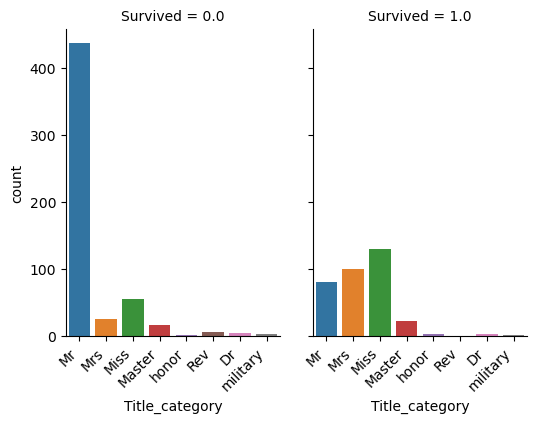

In [70]:
category_survived = sns.catplot(x="Title_category",  col="Survived", data = all_data, kind="count",height=4, aspect=.7)

category_survived.set_xticklabels(rotation=45, horizontalalignment='right',fontweight='light')

plt.show()
# passengers with the title Mr have the hight number of drowning and passengers with the title miss have the highest in number in survivals

## Relation between classes and Titles

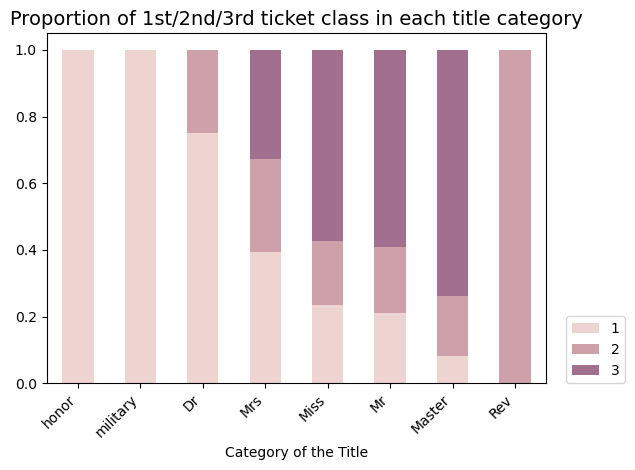

In [71]:
class_by_title_cat = all_data.groupby('Title_category')['Pclass'].value_counts(normalize = True)
class_by_title_cat = class_by_title_cat.unstack().sort_values(by = 1, ascending = False)
class_by_title_cat.plot(kind='bar', stacked='True', color = ['#eed4d0', '#cda0aa', '#a2708e'])
plt.legend(loc=(1.04,0))
_ = plt.xticks(
    rotation = 45, 
    horizontalalignment = 'right',
    fontweight = 'light'  
)


plt.title('Proportion of 1st/2nd/3rd ticket class in each title category',fontsize= 14)
plt.xlabel('Category of the Title')
plt.tight_layout()
# The military and the honor titles are all in the first class
# revrends were all in the 2nd class
# masters occupied the most of the third class

## Cabins

In [72]:
# Get all cabin letters
all_data['deck'] = all_data['Cabin'].str.split('', expand = True)[1]
all_data.loc[all_data['deck'].isna(), 'deck'] = 'U'
print('Unique deck letters from the cabin numbers:', all_data['deck'].unique())

Unique deck letters from the cabin numbers: ['U' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


## Relation between cabins and survival

<Figure size 750x500 with 0 Axes>

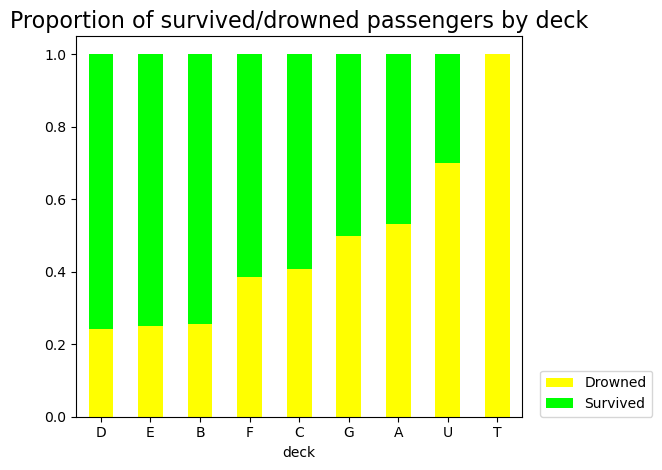

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_category,deck
96,97,0.0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,Mr,Mr,A
174,175,0.0,1,"Smith, Mr. James Clinch",male,56.0,0,0,17764,30.6958,A7,C,Mr,Mr,A
185,186,0.0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S,Mr,Mr,A
284,285,0.0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S,Mr,Mr,A
475,476,0.0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,Mr,Mr,A
583,584,0.0,1,"Ross, Mr. John Hugo",male,36.0,0,0,13049,40.1250,A10,C,Mr,Mr,A
806,807,0.0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,Mr,Mr,A
867,868,0.0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S,Mr,Mr,A


In [73]:
fig = plt.figure(figsize=(7.5, 5))
deck_by_survived = all_data.groupby('deck')['Survived'].value_counts(normalize = True).unstack()
deck_by_survived = deck_by_survived.sort_values(by = 1, ascending = False)
deck_by_survived.plot(kind='bar', stacked='True', color=["#ffff00", "#00ff00"])
plt.title('Proportion of survived/drowned passengers by deck',fontsize= 16)
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)
plt.tight_layout()

plt.show()

all_data[(all_data['deck']=='A') & (all_data['Survived']==0)]

Most passengers don't have cabin numbers. The largest part of passengers with known cabin numbers was located on the 'C' deck and had 1st class ticket. 'C' deck is fifth by a percentage of the survivor.
The largest surviving rate (among passengers with known cabin numbers in training dataset) had passengers from deck 'D'. Deck A was the closest to the deck with lifeboats, but it is the last in the surviving rate.

## Family

In [74]:
all_data['Family_size'] = all_data['SibSp'] + all_data['Parch'] + 1
family_size = all_data['Family_size'].value_counts()
print('Family size and number of passengers:')
print(family_size)

Family size and number of passengers:
1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: Family_size, dtype: int64


<Figure size 600x400 with 0 Axes>

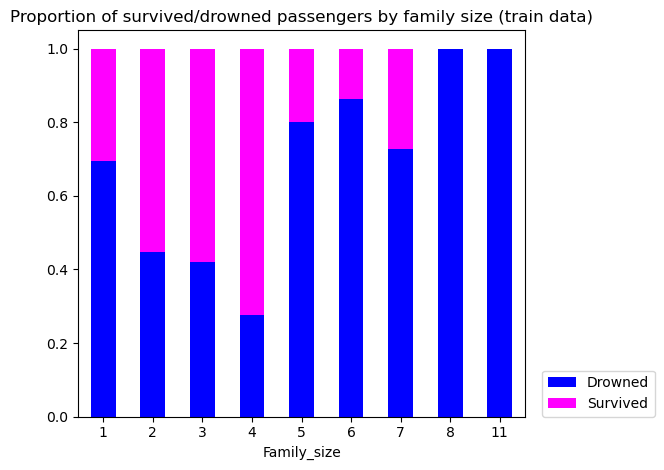

In [75]:
all_data.loc[all_data['PassengerId'] == 69, ['SibSp', 'Parch', 'Family_size']] = [0,0,1]
all_data.loc[all_data['PassengerId'] == 1106, ['SibSp', 'Parch', 'Family_size']] = [0,0,1]
all_data[(all_data['Ticket'] == '3101281') | (all_data['Ticket'] == '347091')]

fig = plt.figure(figsize = (6,4))

d = all_data.groupby('Family_size')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', color=["#0000FF", "#FF00FF"], stacked='True')
plt.title('Proportion of survived/drowned passengers by family size (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)

plt.tight_layout()

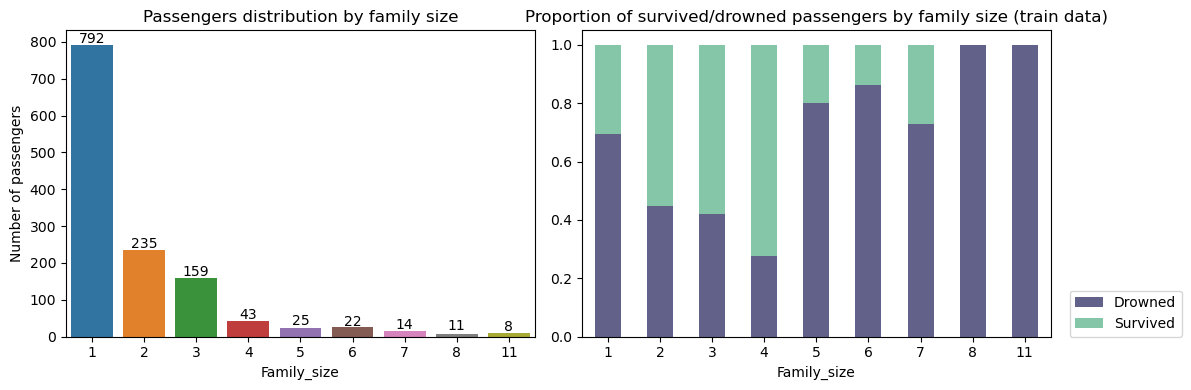

In [76]:
fig = plt.figure(figsize = (12,4))

ax1 = fig.add_subplot(121)
ax = sns.countplot(x='Family_size', data=all_data, ax=ax1)
# calculate passengers for each category
labels = (all_data['Family_size'].value_counts())
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+6, str(v), horizontalalignment = 'center', size = 10, color = 'black')
    
plt.title('Passengers distribution by family size')
plt.ylabel('Number of passengers')

ax2 = fig.add_subplot(122)
d = all_data.groupby('Family_size')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', color=["#3f3e6fd1", "#85c6a9"], stacked='True', ax = ax2)
plt.title('Proportion of survived/drowned passengers by family size (train data)')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)

plt.tight_layout()

The family size on board also seems to have an influence on chances for survival: there were two large families with sizes 8 and 11 and all their members from the training dataset are drowned. We can observe that the percentage of survivors in people who have a family of 2, 3, 4 people is greater than in singles, then the percentage of survivors decreases as the family size increases.

In [77]:
all_data['Family_size'].reset_index()

,index,Family_size
0,0,2
1,1,2
2,2,1
3,3,2
4,4,1
...,...,...
1304,413,1
1305,414,1
1306,415,1
1307,416,1


## Class

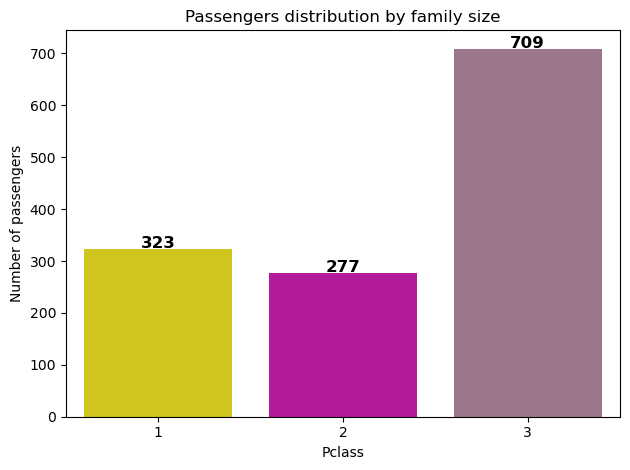

In [78]:
ax = sns.countplot(data=all_data, x='Pclass', palette=['#eedd00', '#cd00aa', '#a2708e'])
# calculate passengers for each category
labels = (all_data['Pclass'].value_counts(sort = False))
# add result numbers on barchart

for i, v in enumerate(labels.sort_index()):
    ax.text(i, v+2, str(v), horizontalalignment = 'center', size = 12, color = 'black', fontweight = 'bold')
    
    
plt.title('Passengers distribution by family size')
plt.ylabel('Number of passengers')
plt.tight_layout()

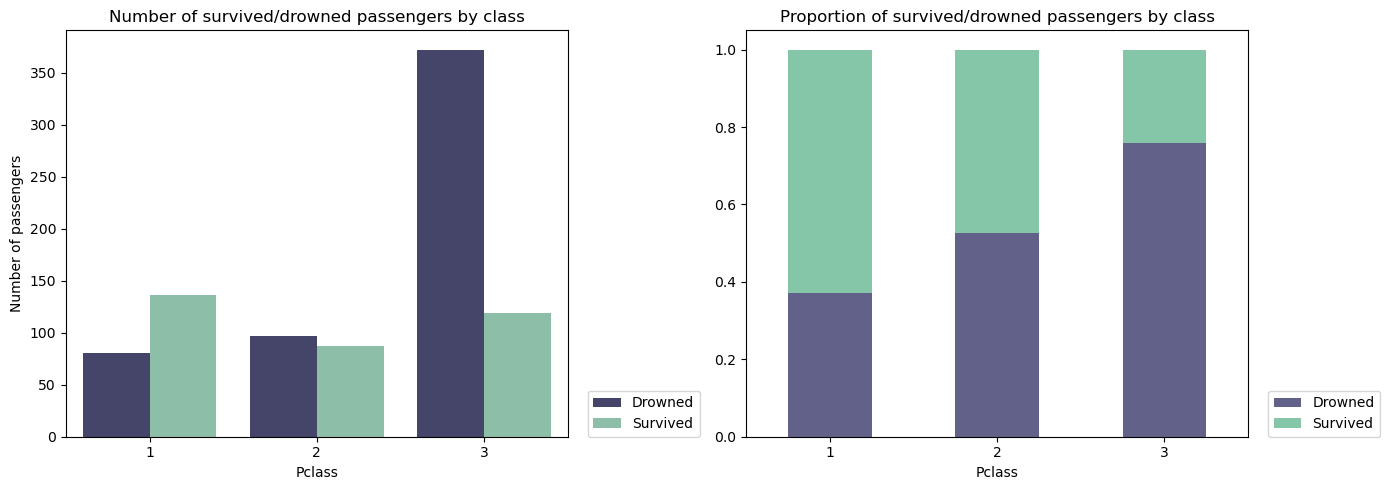

In [79]:
fig = plt.figure(figsize=(14, 5))

ax1 = fig.add_subplot(121)
sns.countplot(x = 'Pclass', hue = 'Survived', data = all_data, palette=["#3f3e6fd1", "#85c6a9"], ax = ax1)
plt.title('Number of survived/drowned passengers by class')
plt.ylabel('Number of passengers')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

ax2 = fig.add_subplot(122)
d = all_data.groupby('Pclass')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', stacked='True', ax = ax2, color =["#3f3e6fd1", "#85c6a9"])
plt.title('Proportion of survived/drowned passengers by class')
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
_ = plt.xticks(rotation=False)

plt.tight_layout()
#Baisically passengers who are richer had a higher survival chance because they were prioritized

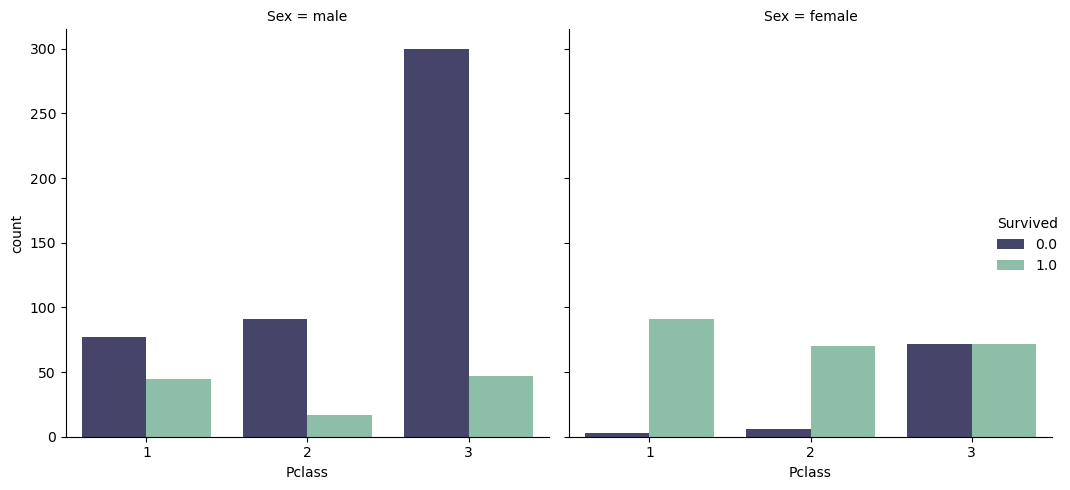

In [80]:
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', kind = 'count', data = all_data , palette=["#3f3e6fd1", "#85c6a9"])

plt.tight_layout()
# if the passenger is a femal and from a higher class have a much higher chance to survive

Most of the Titanic's passengers were traveling third class (709). The second class is the smallest in terms of the number of passengers. Despite the previously identified prerequisites (on average, older people are more likely to die, and in the first class, the average age is higher than in other classes. Also, passengers on deck A, which consists of 100% first class, have a large proportion of drowned passengers), the first-class has the largest number of survivors and the proportion of survivors within the class is the largest.
Third-class tickets had the highest number of drowned passengers, and most of the third-class passengers drowned.

# Embarked

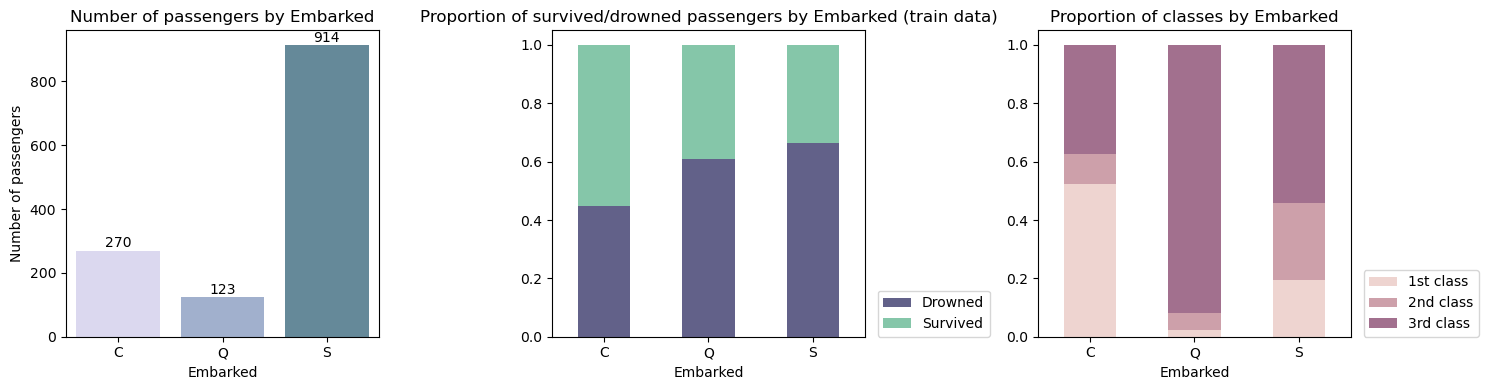

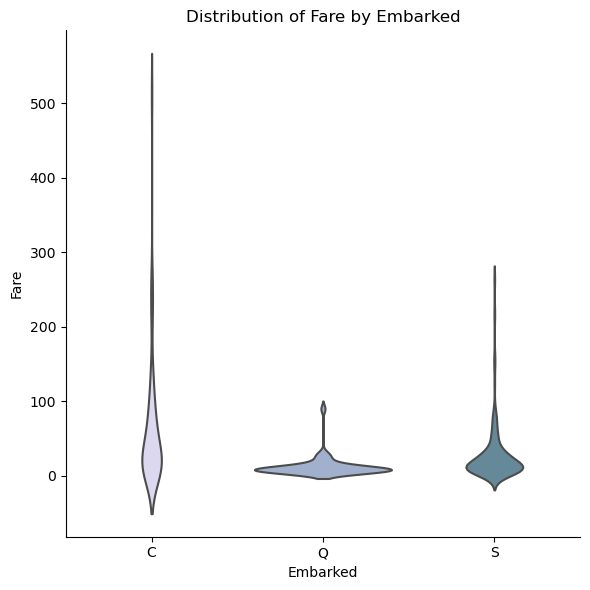

In [81]:
# Create a new figure for subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

# Subplot 1: Number of passengers by Embarked
palette = sns.cubehelix_palette(5, start=2)
sns.countplot(data=all_data, x='Embarked', palette=palette, order=['C', 'Q', 'S'], ax=ax1)
ax1.set_title('Number of passengers by Embarked')
ax1.set_ylabel('Number of passengers')

# Calculate passengers for each category
labels = all_data['Embarked'].value_counts().sort_index()
# Add result numbers on the bar chart
for i, v in enumerate(labels):
    ax1.text(i, v + 10, str(v), horizontalalignment='center', size=10, color='black')

# Subplot 2: Proportion of survived/drowned passengers by Embarked
surv_by_emb = all_data.groupby('Embarked')['Survived'].value_counts(normalize=True).unstack().sort_index()
surv_by_emb.plot(kind='bar', stacked=True, color=["#3f3e6fd1", "#85c6a9"], ax=ax2)
ax2.set_title('Proportion of survived/drowned passengers by Embarked (train data)')
ax2.legend(('Drowned', 'Survived'), loc=(1.04, 0))
ax2.set_xticklabels(surv_by_emb.index, rotation=0)

# Subplot 3: Proportion of classes by Embarked
class_by_emb = all_data.groupby('Embarked')['Pclass'].value_counts(normalize=True).unstack().sort_index()
class_by_emb.plot(kind='bar', stacked=True, color=['#eed4d0', '#cda0aa', '#a2708e'], ax=ax3)
ax3.legend(('1st class', '2nd class', '3rd class'), loc=(1.04, 0))
ax3.set_title('Proportion of classes by Embarked')
ax3.set_xticklabels(class_by_emb.index, rotation=0)

# Tight layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()
sns.catplot(x="Embarked", y="Fare", kind="violin", inner=None,
            data=all_data, height = 6, palette = palette, order = ['C', 'Q', 'S'])
plt.title('Distribution of Fare by Embarked')
plt.tight_layout()

Most numbers of passengers (914) were embarked in Southampton. Also, Southampton has the biggest proportion of drowned passengers. 270 passengers embarked in Cherbourg and more than 50% of them survived (in the training dataset). 123 of passengers embarked in Queenstown, the vast majority of them are 3rd class passengers.

# Figuring out NA data in age 

In [82]:
all_data['Family_size'] = all_data['SibSp'] + all_data['Parch'] + 1
family_size = all_data['Family_size'].value_counts()
print('Family size and number of passengers:')
print(family_size)
all_data['Surname'] = all_data['Name'].str.split(',', expand = True)[0]
all_data[(all_data['Family_size'] == 7) & (all_data['Surname']=='Andersson')]


Family size and number of passengers:
1     792
2     235
3     159
4      43
6      25
5      22
7      14
11     11
8       8
Name: Family_size, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_category,deck,Family_size,Surname
13,14,0.0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S,Mr,Mr,U,7,Andersson
119,120,0.0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S,Miss,Miss,U,7,Andersson
541,542,0.0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S,Miss,Miss,U,7,Andersson
542,543,0.0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S,Miss,Miss,U,7,Andersson
610,611,0.0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S,Mrs,Mrs,U,7,Andersson
813,814,0.0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S,Miss,Miss,U,7,Andersson
850,851,0.0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S,Master,Master,U,7,Andersson


In [83]:
all_data.sort_values(["Fare"], ascending= False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_category,deck,Family_size,Surname
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,Miss,Miss,U,1,Ward
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mr,Mr,B,2,Cardeza
343,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,Mrs,Mrs,B,2,Cardeza
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,Mr,Mr,B,1,Lesurer
341,342,1.0,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,Miss,C,6,Fortune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,816,0.0,1,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0000,B102,S,Mr,Mr,B,1,Fry
302,303,0.0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S,Mr,Mr,U,1,Johnson
806,807,0.0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S,Mr,Mr,A,1,Andrews
263,264,0.0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S,Mr,Mr,B,1,Harrison


In [84]:
new_df = all_data.copy()
duplicates= new_df.duplicated(subset=["Ticket","Fare"])
duplicated_tickets= new_df[duplicates]
duplicated_tickets

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_category,deck,Family_size,Surname
24,25,0.0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S,Miss,Miss,U,5,Palsson
71,72,0.0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,NaN,S,Miss,Miss,U,8,Goodwin
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,Miss,Miss,C,6,Fortune
117,118,0.0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S,Mr,Mr,U,2,Turpin
119,120,0.0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,S,Miss,Miss,U,7,Andersson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,Mr,Mr,C,3,Widener
409,1301,NaN,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,Miss,Miss,U,3,Peacock
411,1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,Mrs,Mrs,C,2,Minahan
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Dona,honor,C,1,Oliva y Ocana


           Age      Fare
Age   1.000000  0.179908
Fare  0.179908  1.000000


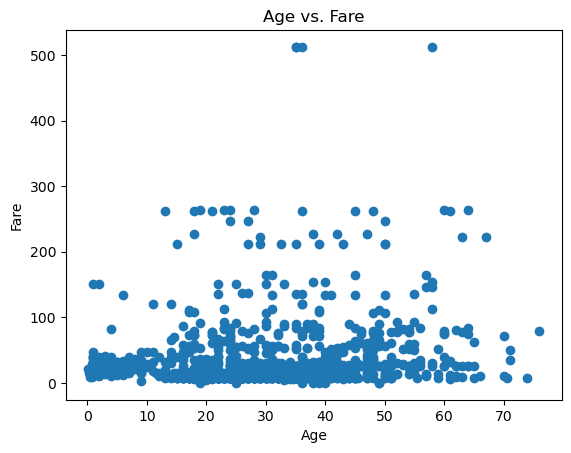

In [85]:
# Correlation analysis
correlation = all_data[['Age', 'Fare']].corr()
print(correlation)
plt.scatter(all_data['Age'], all_data['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.show()

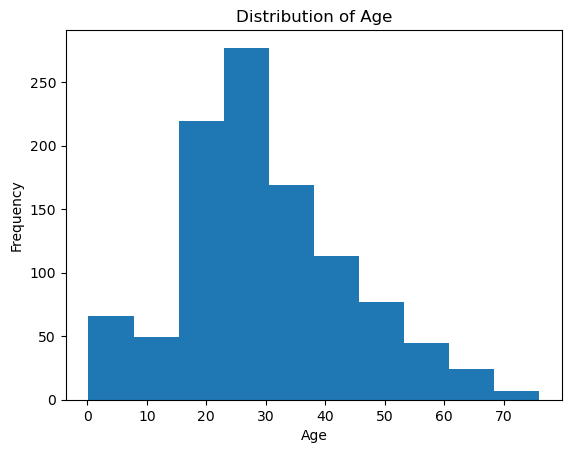

In [86]:
plt.hist(all_data['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

In [87]:
def update_age(params):
    pclass = params[0]
    title = params[1]
    sex = params[2]
    age = params[3]
    if pd.isnull(age):
        age = np.float(age_df[(age_df['Title'] == title) & (age_df["Sex"] == sex) & (age_df['Pclass'] == pclass)]["Age"])
    return age

# Dataframe to group age across Pclass, Title and Sex
age_df = all_data.groupby(['Pclass','Title','Sex']).Age.mean().reset_index()


In [88]:
mr_filter = all_data['Title'] == 'Mr'
mr_filterd=all_data[mr_filter]
mr_avg = all_data[mr_filter]['Age'].mean()
mr_filterd_disc=pd.DataFrame(mr_filterd['Age'].describe())
mr_filterd_disc

mrs_filter = all_data['Title'] == 'Mrs'
mrs_filterd=all_data[mrs_filter]
mrs_avg = all_data[mrs_filter]['Age'].mean()
mrs_filterd_disc=pd.DataFrame(mrs_filterd['Age'].describe())
mrs_filterd_disc

master_filter = all_data['Title'] == 'Master'
master_filterd=all_data[master_filter]
master_avg = all_data[master_filter]['Age'].mean()
master_filterd_disc=pd.DataFrame(master_filterd['Age'].describe())
master_filterd_disc

miss_filter = all_data['Title'] == 'Miss'
miss_filterd=all_data[miss_filter]
miss_avg = all_data[miss_filter]['Age'].mean()
miss_filterd_disc=pd.DataFrame(miss_filterd['Age'].describe())
miss_filterd_disc

dr_filter = all_data['Title'] == 'Dr'
dr_filterd=all_data[dr_filter]
dr_avg = all_data[dr_filter]['Age'].mean()
dr_filterd_disc=pd.DataFrame(dr_filterd['Age'].describe())
dr_filterd_disc

pd.concat([mr_filterd_disc, age_3_class_stat], axis=0, sort = False, keys = ['1st', '2nd', '3rd'])

Age  count       mean        std   min   25%   50%   75%  \
1st count   581.000000    NaN        NaN        NaN   NaN   NaN   NaN   NaN   
    mean     32.197074    NaN        NaN        NaN   NaN   NaN   NaN   NaN   
    std      12.280148    NaN        NaN        NaN   NaN   NaN   NaN   NaN   
    min      11.000000    NaN        NaN        NaN   NaN   NaN   NaN   NaN   
    25%      23.000000    NaN        NaN        NaN   NaN   NaN   NaN   NaN   
    50%      29.000000    NaN        NaN        NaN   NaN   NaN   NaN   NaN   
    75%      39.000000    NaN        NaN        NaN   NaN   NaN   NaN   NaN   
    max      74.000000    NaN        NaN        NaN   NaN   NaN   NaN   NaN   
2nd female         NaN  152.0  22.185329  12.205254  0.17  16.0  22.0  30.0   
    male           NaN  349.0  25.962264  11.682415  0.33  20.0  25.0  32.0   

             max  
1st count    NaN  
    mean     NaN  
    std      NaN  
    min      NaN  
    25%      NaN  
    50%      NaN  
    75%      NaN  
    max      NaN  
2nd female  63.0  
    male    74.0

In [89]:
df = pd.DataFrame([
    ['joe', 111, 25.0],
    ['joe', 111, 30.0]
], columns=['Name', 'ID', 'Amount'])
df.groupby(['Name', 'ID']).agg(Average_Revenue=('Amount', np.mean), Sum_Revenue=('Amount', np.sum))

,,Average_Revenue,Sum_Revenue
Name,ID,,
joe,111,27.5,55.0


In [90]:
pd.DataFrame(
    all_data.groupby(['Title', 'Pclass'])['Age'].describe()
).reset_index().sort_values('count', ascending=False)

,Title,Pclass,count,mean,std,min,25%,50%,75%,max
19,Mr,3,312.0,28.318910,9.907858,11.00,21.000,26.0,33.00,74.0
18,Mr,2,137.0,32.346715,11.862038,14.00,24.000,30.0,38.00,70.0
17,Mr,1,132.0,41.208333,13.072032,17.00,30.000,41.5,50.00,71.0
14,Miss,3,103.0,17.360874,9.935434,0.17,9.000,18.0,23.00,45.0
20,Mrs,1,67.0,43.208955,14.034090,17.00,35.000,45.0,53.50,76.0
12,Miss,1,59.0,30.338983,11.668718,2.00,22.000,30.0,36.00,63.0
21,Mrs,2,54.0,33.518519,10.493018,14.00,25.250,30.5,40.75,60.0
22,Mrs,3,49.0,32.326531,10.194745,15.00,26.000,31.0,39.00,63.0
13,Miss,2,48.0,20.717083,12.207963,0.92,12.000,20.0,28.50,50.0
11,Master,3,37.0,6.090000,4.152566,0.33,2.000,6.0,9.00,14.5


In [91]:
all_data.groupby(['Title', 'Pclass']).agg(
    freq = ('Age', lambda age_list: len(age_list)),
    minimum = ('Age', min),
)

freq  minimum
Title        Pclass               
Capt         1          1    70.00
Col          1          4    47.00
Don          1          1    40.00
Dona         1          1    39.00
Dr           1          6    32.00
             2          2    23.00
Jonkheer     1          1    38.00
Lady         1          1    48.00
Major        1          2    45.00
Master       1          5     0.92
             2         11     0.67
             3         45     0.33
Miss         1         60     2.00
             2         50     0.92
             3        150     0.17
Mlle         1          2    24.00
Mme          1          1    24.00
Mr           1        159    17.00
             2        150    14.00
             3        448    11.00
Mrs          1         77    17.00
             2         55    14.00
             3         65    15.00
Ms           2          1    28.00
             3          1      NaN
Rev          2          8    27.00
Sir          1          1    49.00
the Countess 1          1    33.00

In [92]:
pd.DataFrame(all_data.groupby('Pclass')['Age'].describe())

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,284.0,39.047254,14.353217,0.92,28.0,39.0,49.25,76.0
2,261.0,29.506705,13.638627,0.67,22.0,29.0,36.00,70.0
3,501.0,24.816367,11.958202,0.17,18.0,24.0,32.00,74.0


In [93]:
def update_age(params):
    pclass = params[0]
    title = params[1]
    sex = params[2]
    age = params[3]
    if pd.isnull(age):
        age = float(age_df[(age_df['Title'] == title) & (age_df["Sex"] == sex) & (age_df['Pclass'] == pclass)]["Age"])
    return age

# Dataframe to group age across Pclass, Title, and Sex
age_df = all_data.groupby(['Pclass', 'Title', 'Sex']).Age.mean().reset_index()
all_data['Age'] = all_data[['Pclass', 'Title', 'Sex', 'Age']].apply(lambda x: update_age(x), axis=1)
all_data.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Title_category,deck,Family_size,Surname
413,1305,NaN,3,"Spector, Mr. Woolf",male,28.31891,0,0,A.5. 3236,8.0500,NaN,S,Mr,Mr,U,1,Spector
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C,Dona,honor,C,1,Oliva y Ocana
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,Mr,U,1,Saether
416,1308,NaN,3,"Ware, Mr. Frederick",male,28.31891,0,0,359309,8.0500,NaN,S,Mr,Mr,U,1,Ware
417,1309,NaN,3,"Peter, Master. Michael J",male,6.09000,1,1,2668,22.3583,NaN,C,Master,Master,U,3,Peter


C:\Users\Saif\AppData\Local\Temp\ipykernel_15420\1516202648.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(all_data[(all_data["Age"] > 0)].Age, kde_kws={"lw": 3}, bins = 50)


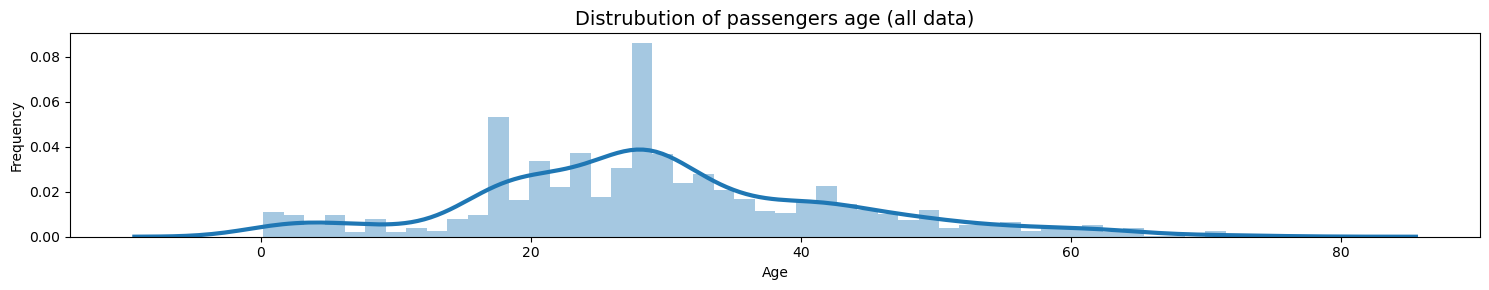

In [94]:
plt.figure(figsize=(15, 3))

# ploting a one dimensional distribution of Age
sns.distplot(all_data[(all_data["Age"] > 0)].Age, kde_kws={"lw": 3}, bins = 50)

plt.title('Distrubution of passengers age (all data)',fontsize= 14)
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.tight_layout()

When we use a naive approach and consider all the parameters separately, then young female first-class passengers with the title Mrs have a moderate number of relatives on Board, who paid a large amount for a ticket and went on Board in Cherbourg have a better chance of survival. For sure, there is a relationship between variables, and survival was influenced not only by the title, or ticket, or age itself but by a combination of factors that are to some extent interrelated.

And It is obvious that there is no algorithm that can predict the survival rate by 100 percent based on the factors of the passenger's location on the ship or his age, since the human factor and the unpredicted emergency were involved in the rescue process.

# Figuring out missing value in Decks

In [95]:
total_miss = all_data.isnull().sum()
percent_miss = (total_miss/all_data.isnull().count()*100)

# Creating dataframe from dictionary
missing_data = pd.DataFrame({'Total missing':total_miss,'% missing':percent_miss})

missing_data.sort_values(by='Total missing',ascending=False).head()

,Total missing,% missing
Cabin,1014,77.463713
Survived,418,31.932773
Embarked,2,0.152788
Age,1,0.076394
Fare,1,0.076394


In [96]:
_ = all_data.rename({'Cabin':'Deck'},axis=1,inplace=True)
all_data['Deck'] = all_data['Deck'].fillna('N')
def cabin_to_deck(row):
    return row['Deck'][0]
all_data['Deck'] = all_data.apply(cabin_to_deck,axis=1)


In [97]:
ticket_list = []
for ticket_id in list(all_data['Ticket'].unique()):
    
    count = all_data[all_data['Ticket']==ticket_id].count()[0]
    decks = all_data[all_data['Ticket']==ticket_id]['Deck']
    empty_decks = (decks=='N').sum()
    
    if (count > 1) and (empty_decks > 0) and (empty_decks < len(decks)):
        ticket_list.append(ticket_id)

print(ticket_list)

for ticket in ticket_list:
    display(all_data[all_data['Ticket']==ticket])

['2668', 'PC 17755', 'PC 17760', '19877', '113781', '17421', 'PC 17608', '36928', 'PC 17757', 'PC 17761', '24160', 'S.O./P.P. 3']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked,Title,Title_category,deck,Family_size,Surname
128,129,1.0,3,"Peter, Miss. Anna",female,17.360874,1,1,2668,22.3583,F,C,Miss,Miss,F,3,Peter
533,534,1.0,3,"Peter, Mrs. Catherine (Catherine Rizk)",female,32.326531,0,2,2668,22.3583,N,C,Mrs,Mrs,U,3,Peter
417,1309,NaN,3,"Peter, Master. Michael J",male,6.090000,1,1,2668,22.3583,N,C,Master,Master,U,3,Peter


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked,Title,Title_category,deck,Family_size,Surname
258,259,1.0,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,N,C,Miss,Miss,U,1,Ward
679,680,1.0,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,Mr,Mr,B,2,Cardeza
737,738,1.0,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,Mr,Mr,B,1,Lesurer
343,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B,C,Mrs,Mrs,B,2,Cardeza


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked,Title,Title_category,deck,Family_size,Surname
269,270,1.0,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C,S,Miss,Miss,C,1,Bissette
325,326,1.0,1,"Young, Miss. Marie Grice",female,36.0,0,0,PC 17760,135.6333,C,C,Miss,Miss,C,1,Young
373,374,0.0,1,"Ringhini, Mr. Sante",male,22.0,0,0,PC 17760,135.6333,N,C,Mr,Mr,U,1,Ringhini
314,1206,NaN,1,"White, Mrs. John Stuart (Ella Holmes)",female,55.0,0,0,PC 17760,135.6333,C,C,Mrs,Mrs,C,1,White


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked,Title,Title_category,deck,Family_size,Surname
290,291,1.0,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.85,N,S,Miss,Miss,U,1,Barber
741,742,0.0,1,"Cavendish, Mr. Tyrell William",male,36.0,1,0,19877,78.85,C,S,Mr,Mr,C,2,Cavendish
96,988,NaN,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.85,C,S,Mrs,Mrs,C,2,Cavendish


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked,Title,Title_category,deck,Family_size,Surname
297,298,0.0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.55,C,S,Miss,Miss,C,4,Allison
305,306,1.0,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.55,C,S,Master,Master,C,4,Allison
498,499,0.0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.55,C,S,Mrs,Mrs,C,4,Allison
708,709,1.0,1,"Cleaver, Miss. Alice",female,22.00,0,0,113781,151.55,N,S,Miss,Miss,U,1,Cleaver
141,1033,NaN,1,"Daniels, Miss. Sarah",female,33.00,0,0,113781,151.55,N,S,Miss,Miss,U,1,Daniels
306,1198,NaN,1,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.55,C,S,Mr,Mr,C,4,Allison


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked,Title,Title_category,deck,Family_size,Surname
306,307,1.0,1,"Fleming, Miss. Margaret",female,30.338983,0,0,17421,110.8833,N,C,Miss,Miss,U,1,Fleming
550,551,1.0,1,"Thayer, Mr. John Borland Jr",male,17.000000,0,2,17421,110.8833,C,C,Mr,Mr,C,3,Thayer
581,582,1.0,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.000000,1,1,17421,110.8833,C,C,Mrs,Mrs,C,3,Thayer
698,699,0.0,1,"Thayer, Mr. John Borland",male,49.000000,1,1,17421,110.8833,C,C,Mr,Mr,C,3,Thayer


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked,Title,Title_category,deck,Family_size,Surname
311,312,1.0,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B,C,Miss,Miss,B,5,Ryerson
742,743,1.0,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B,C,Miss,Miss,B,5,Ryerson
24,916,NaN,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.375,B,C,Mrs,Mrs,B,5,Ryerson
59,951,NaN,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.375,B,C,Miss,Miss,B,1,Chaudanson
64,956,NaN,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.375,B,C,Master,Master,B,5,Ryerson
142,1034,NaN,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.375,B,C,Mr,Mr,B,5,Ryerson
375,1267,NaN,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.375,N,C,Miss,Miss,U,1,Bowen


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked,Title,Title_category,deck,Family_size,Surname
318,319,1.0,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C,S,Miss,Miss,C,3,Wick
856,857,1.0,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,N,S,Mrs,Mrs,U,3,Wick
217,1109,NaN,1,"Wick, Mr. George Dennick",male,57.0,1,1,36928,164.8667,N,S,Mr,Mr,U,3,Wick
400,1292,NaN,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C,S,Miss,Miss,C,1,Bonnell


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked,Title,Title_category,deck,Family_size,Surname
380,381,1.0,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.525,N,C,Miss,Miss,U,1,Bidois
557,558,0.0,1,"Robbins, Mr. Victor",male,41.208333,0,0,PC 17757,227.525,N,C,Mr,Mr,U,1,Robbins
700,701,1.0,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.000000,1,0,PC 17757,227.525,C,C,Mrs,Mrs,C,2,Astor
716,717,1.0,1,"Endres, Miss. Caroline Louise",female,38.000000,0,0,PC 17757,227.525,C,C,Miss,Miss,C,1,Endres
202,1094,NaN,1,"Astor, Col. John Jacob",male,47.000000,1,0,PC 17757,227.525,C,C,Col,military,C,2,Astor


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked,Title,Title_category,deck,Family_size,Surname
537,538,1.0,1,"LeRoy, Miss. Bertha",female,30.0,0,0,PC 17761,106.425,N,C,Miss,Miss,U,1,LeRoy
544,545,0.0,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.425,C,C,Mr,Mr,C,2,Douglas
239,1131,NaN,1,"Douglas, Mrs. Walter Donald (Mahala Dutton)",female,48.0,1,0,PC 17761,106.425,C,C,Mrs,Mrs,C,2,Douglas


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked,Title,Title_category,deck,Family_size,Surname
689,690,1.0,1,"Madill, Miss. Georgette Alexandra",female,15.0,0,1,24160,211.3375,B,S,Miss,Miss,B,2,Madill
730,731,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B,S,Miss,Miss,B,1,Allen
779,780,1.0,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0,1,24160,211.3375,B,S,Mrs,Mrs,B,2,Robert
324,1216,NaN,1,"Kreuchen, Miss. Emilie",female,39.0,0,0,24160,211.3375,N,S,Miss,Miss,U,1,Kreuchen


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked,Title,Title_category,deck,Family_size,Surname
772,773,0.0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5,E,S,Mrs,Mrs,E,1,Mack
841,842,0.0,2,"Mudd, Mr. Thomas Charles",male,16.0,0,0,S.O./P.P. 3,10.5,N,S,Mr,Mr,U,1,Mudd


Text(0.5, 1.0, 'Pclass count for unkown Deck')

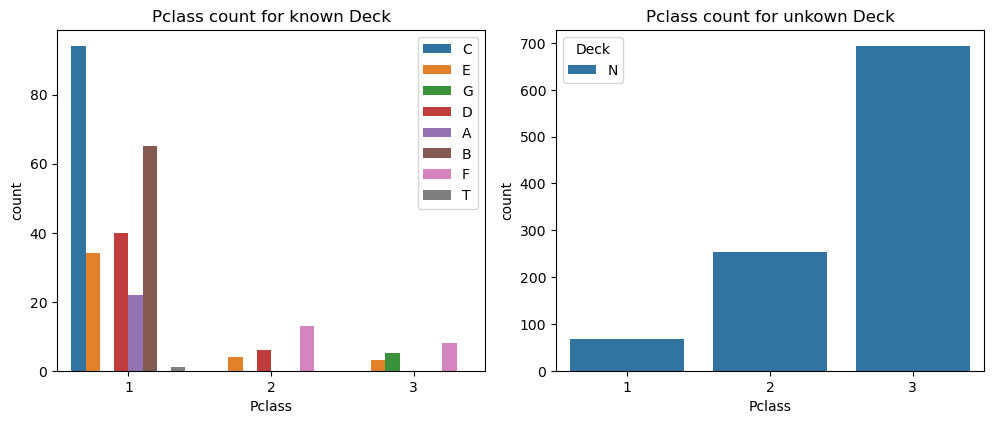

In [98]:
fig,ax = plt.subplots(1,2,figsize = (10,4))
plt.tight_layout(w_pad=2)
ax = ax.ravel()

sns.countplot(x='Pclass',data=all_data[all_data['Deck']!='N'],hue='Deck',ax=ax[0])
ax[0].legend(loc=1)
ax[0].set_title('Pclass count for known Deck')
sns.countplot(x='Pclass',data=all_data[all_data['Deck']=='N'],hue='Deck',ax=ax[1])
ax[1].set_title('Pclass count for unkown Deck')

In [99]:
decks_by_class = [[], [], []]

for i in range(3):
    decks_by_class[i] = list(all_data[all_data['Pclass'] == i + 1]['Deck'].unique())
    print(f'Pclass = {i + 1} decks:', decks_by_class[i])

# Removing null ('N') entries and single 'T' cabin
for i in range(3):
    if 'N' in decks_by_class[i]:
        decks_by_class[i].remove('N')
    if 'T' in decks_by_class[i]:
        decks_by_class[i].remove('T')

Pclass = 1 decks: ['C', 'E', 'A', 'N', 'B', 'D', 'T']
Pclass = 2 decks: ['N', 'D', 'F', 'E']
Pclass = 3 decks: ['N', 'G', 'F', 'E']


In [100]:
weights_by_class = [[],[],[]]

for i,deck_list in enumerate(decks_by_class):
    for deck in deck_list:
        if i == 0:
            class_total = all_data[(all_data['Deck']!='N')&(all_data['Pclass']==i+1)].count()[0]-1
        else:
            class_total = all_data[(all_data['Deck']!='N')&(all_data['Pclass']==i+1)].count()[0]
        deck_total = all_data[(all_data['Deck']==deck)&(all_data['Pclass']==i+1)].count()[0]
        weights_by_class[i].append(deck_total/class_total)
    print(f'Pclass = {i+1} weights:',np.round(weights_by_class[i],3))

Pclass = 1 weights: [0.369 0.133 0.086 0.255 0.157]
Pclass = 2 weights: [0.261 0.565 0.174]
Pclass = 3 weights: [0.312 0.5   0.188]


In [101]:
ticket_dict = {}

def impute_deck(row):
    
    ticket = row['Ticket']
    deck = row['Deck']
    pclass = row['Pclass']
    
    if (deck == 'N') and (ticket not in ticket_dict):
        
        if pclass == 1:
            deck = list(np.random.choice(decks_by_class[0],size=1,
                                         p=weights_by_class[0]))[0]
        elif pclass ==2:
            deck = list(np.random.choice(decks_by_class[1],size=1,
                                         p=weights_by_class[1]))[0]
        elif pclass ==3:
            deck = list(np.random.choice(decks_by_class[2],size=1,
                                         p=weights_by_class[2]))[0]
        
        ticket_dict[ticket] = deck
        
    elif (deck == 'N') and (ticket in ticket_dict):
        deck = ticket_dict[ticket]
    
    return deck


In [102]:
all_data['Deck'] = all_data.apply(impute_deck,axis=1)
all_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked,Title,Title_category,deck,Family_size,Surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,F,S,Mr,Mr,U,2,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C,C,Mrs,Mrs,C,2,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,E,S,Miss,Miss,U,1,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C,S,Mrs,Mrs,C,2,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,E,S,Mr,Mr,U,1,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,28.31891,0,0,A.5. 3236,8.0500,F,S,Mr,Mr,U,1,Spector
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C,C,Dona,honor,C,1,Oliva y Ocana
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,F,S,Mr,Mr,U,1,Saether
416,1308,NaN,3,"Ware, Mr. Frederick",male,28.31891,0,0,359309,8.0500,G,S,Mr,Mr,U,1,Ware


# ML models using one-hot encoding

In [103]:
tree_df= all_data[all_data['Embarked'].isna() == False]
tree_df= all_data[all_data['Survived'].isna() == False]
tree_df['Embarked'].isna().sum()
tree_df['Deck'].isna().sum()
tree_df['Pclass'] = tree_df['Pclass'].astype(str)

tree_df['Deck'].isna().sum()
tree_df['Age'].fillna(tree_df['Age'].median(), inplace=True)
tree_df['Fare'].fillna(tree_df['Fare'].median(), inplace=True)
new_df= tree_df
new_df

C:\Users\Saif\AppData\Local\Temp\ipykernel_15420\264494638.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df['Pclass'] = tree_df['Pclass'].astype(str)
C:\Users\Saif\AppData\Local\Temp\ipykernel_15420\264494638.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df['Age'].fillna(tree_df['Age'].median(), inplace=True)
C:\Users\Saif\AppData\Local\Temp\ipykernel_15420\264494638.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Deck,Embarked,Title,Title_category,deck,Family_size,Surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,F,S,Mr,Mr,U,2,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C,Mrs,Mrs,C,2,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,E,S,Miss,Miss,U,1,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S,Mrs,Mrs,C,2,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,E,S,Mr,Mr,U,1,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,F,S,Rev,Rev,U,1,Montvila
887,888,1.0,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S,Miss,Miss,B,1,Graham
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,17.360874,1,2,W./C. 6607,23.4500,E,S,Miss,Miss,U,4,Johnston
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C,Mr,Mr,C,1,Behr


In [104]:
bins = [0, 18, 30, 45, 60, float('inf')]  # Define your age groups here
labels = ['0-18', '19-30', '31-45', '46-60', '61+']  # Label each age group
tree_df['Age_Group'] = pd.cut(tree_df['Age'], bins=bins, labels=labels)
# Check the unique values in the 'Sex' column
print(tree_df['Sex'].unique())

# Encode categorical variables
tree_df['Sex'] = tree_df['Sex'].map({'female': 0, 'male': 1})

# Apply one-hot encoding to the 'Pclass' column
pclass_encoded = pd.get_dummies(tree_df['Pclass'], prefix='Pclass')
age_group_encoded = pd.get_dummies(tree_df['Age_Group'], prefix='Age_Group')
# Apply one-hot encoding to the 'Embarked' column
embarked_encoded = pd.get_dummies(tree_df['Embarked'], prefix='Embarked')
deck_encoded = pd.get_dummies(tree_df['Deck'], prefix='Deck')

# Drop the original 'Pclass' and 'Embarked' columns
tree_df.drop(columns=['Pclass', 'Embarked',"Deck","Age","Age_Group"], inplace=True)

# Concatenate the one-hot encoded columns back to the DataFrame
tree_df = pd.concat([tree_df, pclass_encoded, embarked_encoded,deck_encoded,age_group_encoded], axis=1)

# Select features and target variable
X = tree_df[['Sex', 'Age_Group_0-18', 'Age_Group_19-30','Age_Group_31-45', 'Age_Group_46-60','Age_Group_61+', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S','Deck_C','Deck_E', 'Deck_A', 'Deck_B', 'Deck_D', 'Deck_F','Deck_G']]

y = tree_df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

['male' 'female']
Accuracy: 0.8212290502793296
Confusion Matrix:
[[89 16]
 [16 58]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       105
         1.0       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



C:\Users\Saif\AppData\Local\Temp\ipykernel_15420\1380387733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df['Age_Group'] = pd.cut(tree_df['Age'], bins=bins, labels=labels)
C:\Users\Saif\AppData\Local\Temp\ipykernel_15420\1380387733.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df['Sex'] = tree_df['Sex'].map({'female': 0, 'male': 1})
C:\Users\Saif\AppData\Local\Temp\ipykernel_15420\1380387733.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [105]:
tree_df.drop(['Name','Ticket','Surname','Title', 'Title_category'], axis=1)

,PassengerId,Survived,Sex,SibSp,Parch,Fare,deck,Family_size,Pclass_1,Pclass_2,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Age_Group_0-18,Age_Group_19-30,Age_Group_31-45,Age_Group_46-60,Age_Group_61+
0,1,0.0,1,1,0,7.2500,U,2,0,0,...,0,0,1,0,0,0,1,0,0,0
1,2,1.0,0,1,0,71.2833,C,2,1,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,0,0,0,7.9250,U,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,4,1.0,0,1,0,53.1000,C,2,1,0,...,0,0,0,0,0,0,0,1,0,0
4,5,0.0,1,0,0,8.0500,U,1,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,1,0,0,13.0000,U,1,0,1,...,0,0,1,0,0,0,1,0,0,0
887,888,1.0,0,0,0,30.0000,B,1,1,0,...,0,0,0,0,0,0,1,0,0,0
888,889,0.0,0,1,2,23.4500,U,4,0,0,...,0,1,0,0,0,1,0,0,0,0
889,890,1.0,1,0,0,30.0000,C,1,1,0,...,0,0,0,0,0,0,1,0,0,0


In [106]:
tree_df.drop(['Name','Ticket','Surname','Title', 'Title_category'], axis=1)

,PassengerId,Survived,Sex,SibSp,Parch,Fare,deck,Family_size,Pclass_1,Pclass_2,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Age_Group_0-18,Age_Group_19-30,Age_Group_31-45,Age_Group_46-60,Age_Group_61+
0,1,0.0,1,1,0,7.2500,U,2,0,0,...,0,0,1,0,0,0,1,0,0,0
1,2,1.0,0,1,0,71.2833,C,2,1,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,0,0,0,7.9250,U,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,4,1.0,0,1,0,53.1000,C,2,1,0,...,0,0,0,0,0,0,0,1,0,0
4,5,0.0,1,0,0,8.0500,U,1,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0.0,1,0,0,13.0000,U,1,0,1,...,0,0,1,0,0,0,1,0,0,0
887,888,1.0,0,0,0,30.0000,B,1,1,0,...,0,0,0,0,0,0,1,0,0,0
888,889,0.0,0,1,2,23.4500,U,4,0,0,...,0,1,0,0,0,1,0,0,0,0
889,890,1.0,1,0,0,30.0000,C,1,1,0,...,0,0,0,0,0,0,1,0,0,0


# ML models using mapping

In [53]:
tree_df['Age'].fillna(tree_df['Age'].median(), inplace=True)
tree_df['Fare'].fillna(tree_df['Fare'].median(), inplace=True)

# Encode categorical variables
tree_df['Sex'] = tree_df['Sex'].map({'female': 0, 'male': 1})
tree_df['Embarked_mapped'] = tree_df['Embarked'].map({'Q': 0, 'S': 1,'C':2})
tree_df = tree_df.dropna(subset=['Embarked_mapped'])

# Select features and target variable
X = tree_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' , 'Embarked_mapped']]


y = tree_df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the decision tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Make predictions
y_pred = decision_tree.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.7584269662921348
Confusion Matrix:
[[82 27]
 [16 53]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.75      0.79       109
         1.0       0.66      0.77      0.71        69

    accuracy                           0.76       178
   macro avg       0.75      0.76      0.75       178
weighted avg       0.77      0.76      0.76       178



C:\Users\Saif\AppData\Local\Temp\ipykernel_15420\749494212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df['Age'].fillna(tree_df['Age'].median(), inplace=True)
C:\Users\Saif\AppData\Local\Temp\ipykernel_15420\749494212.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tree_df['Fare'].fillna(tree_df['Fare'].median(), inplace=True)
C:\Users\Saif\AppData\Local\Temp\ipykernel_15420\749494212.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa